In [2]:
import numpy as np
import pandas as pd

## 1. Cargamos los datos

In [3]:
datos = np.load('proyecto_training_data.npy')
df = pd.DataFrame(datos)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [4]:
# Colocamos nombres al dataframe para poder identificar mejor las columnas

df.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [5]:
print("Forma de los datos cargados:", df.shape)

Forma de los datos cargados: (1460, 6)


## 2. Separacion de datos utilizando sclicing

In [6]:
# mezclamos los datos aleatoriamente
np.random.shuffle(datos)

# calculamos el índice para la división
filas = datos.shape[0]
cantidad_entrenamiento = int(0.8 * filas)

# separamos los datos en conjuntos de entrenamiento y validación/pruebas
datos_entrenamiento = datos[:cantidad_entrenamiento]
datos_validacion = datos[cantidad_entrenamiento:]

# Verificar las formas de los conjuntos de datos
print("Forma de datos_entrenamiento:", datos_entrenamiento.shape)
print("Forma de datos_validacion:", datos_validacion.shape)


Forma de datos_entrenamiento: (1168, 6)
Forma de datos_validacion: (292, 6)


# 3. Analisis exploratorio de datos

In [12]:
df_entrenamiento = pd.DataFrame(datos_entrenamiento)
df_entrenamiento.dropna() 

df_entrenamiento

,0,1,2,3,4,5
0,79500.0,5.0,779.0,4.0,1930.0,50.0
1,159500.0,7.0,1576.0,8.0,1890.0,60.0
2,140000.0,6.0,1375.0,5.0,1954.0,75.0
3,257000.0,8.0,1844.0,7.0,2005.0,88.0
4,245350.0,8.0,1694.0,7.0,2008.0,64.0
...,...,...,...,...,...,...
1163,169900.0,6.0,1034.0,6.0,1976.0,NaN
1164,149900.0,5.0,1466.0,6.0,1959.0,134.0
1165,127000.0,5.0,955.0,6.0,1966.0,66.0
1166,231500.0,7.0,963.0,7.0,2001.0,80.0


In [13]:
print('Estadistica Descriptiva')
print(df_entrenamiento.describe())

# Calcular el rango peak to peak
rango_peak_to_peak = df_entrenamiento.max() - df_entrenamiento.min()

print("\n")
print("\n")
print("Rango (peak to peak):")
print(rango_peak_to_peak)


Estadistica Descriptiva
                   0            1            2            3            4  \
count    1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   179641.196062     6.065925  1162.029966     6.512842  1970.920377   
std     79942.963427     1.378599   390.495669     1.677976    29.941096   
min     37900.000000     1.000000   334.000000     2.000000  1872.000000   
25%    129900.000000     5.000000   883.500000     5.000000  1953.000000   
50%    160500.000000     6.000000  1085.500000     6.000000  1972.000000   
75%    210250.000000     7.000000  1378.000000     7.000000  2000.000000   
max    755000.000000    10.000000  4692.000000    14.000000  2010.000000   

                5  
count  968.000000  
mean    69.840909  
std     24.777636  
min     21.000000  
25%     58.750000  
50%     68.500000  
75%     80.000000  
max    313.000000  




Rango (peak to peak):
0    717100.0
1         9.0
2      4358.0
3        12.0
4       138.0
5       292.0
d

## 4. Para cada variable Graficamos un histograma de la variable

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


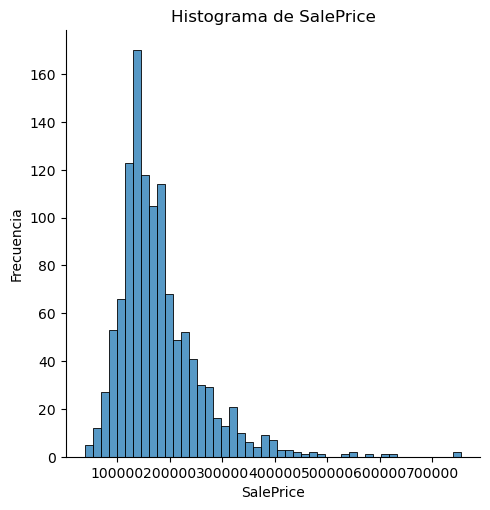

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


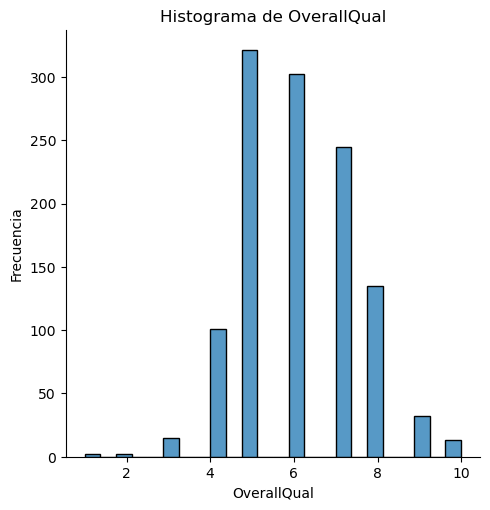

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


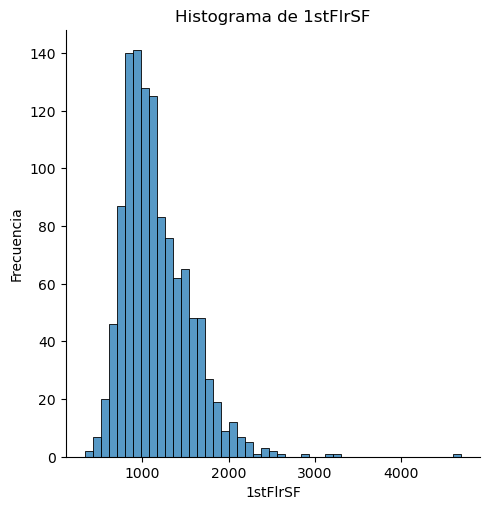

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


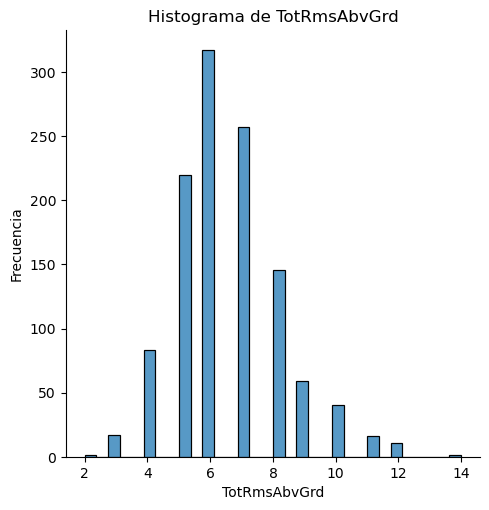

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


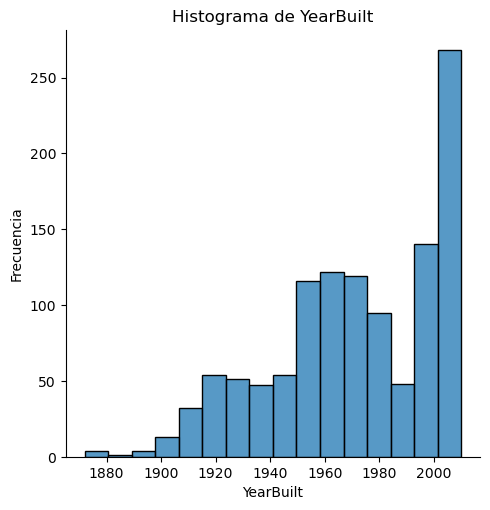

/Users/lotus-mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


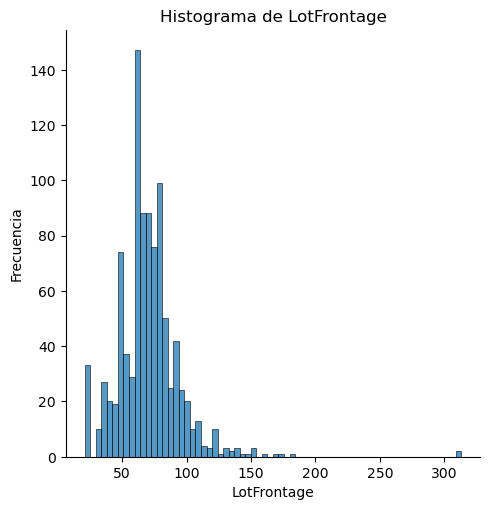

In [14]:
df_entrenamiento.columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']


for columna in df_entrenamiento.columns:
    sns.displot(df_entrenamiento[columna], kde=False)
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()




## 5. Para cada variable independiente x :

### 5.1 Calcular el coeficiente de correlacion entre x y y

In [15]:
correlacionOverallQual = df_entrenamiento['OverallQual'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'OverallQual' e y = 'SalePrice:", correlacionOverallQual)

correlacion1stFlrSF = df_entrenamiento['1stFlrSF'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = '1stFlrSF' e y = 'SalePrice:", correlacion1stFlrSF)

correlacionTotRmsAbvGrd = df_entrenamiento['TotRmsAbvGrd'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'TotRmsAbvGrd' e y = 'SalePrice:", correlacionTotRmsAbvGrd)

correlacionYearBuilt = df_entrenamiento['YearBuilt'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'YearBuilt' e y = 'SalePrice:", correlacionYearBuilt)

correlacionLotFrontage = df_entrenamiento['LotFrontage'].corr(df_entrenamiento['SalePrice'])
print("Coeficiente de correlación entre x = 'LotFrontage' e y = 'SalePrice:", correlacionLotFrontage)

Coeficiente de correlación entre x = 'OverallQual' e y = 'SalePrice: 0.788050554302901
Coeficiente de correlación entre x = '1stFlrSF' e y = 'SalePrice: 0.595019699894875
Coeficiente de correlación entre x = 'TotRmsAbvGrd' e y = 'SalePrice: 0.5341624015989392
Coeficiente de correlación entre x = 'YearBuilt' e y = 'SalePrice: 0.5211252262166859
Coeficiente de correlación entre x = 'LotFrontage' e y = 'SalePrice: 0.3585813296139284


### 5.2 Graficar x vs y(scatterplot) usando matplotlib. 
### 5.3 Colocar el coeficiente de correlacion y colocarlo como parte del tıtulo de la grafica.

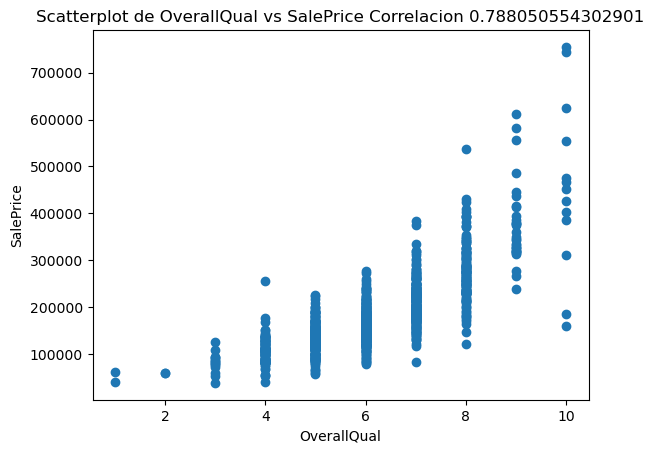

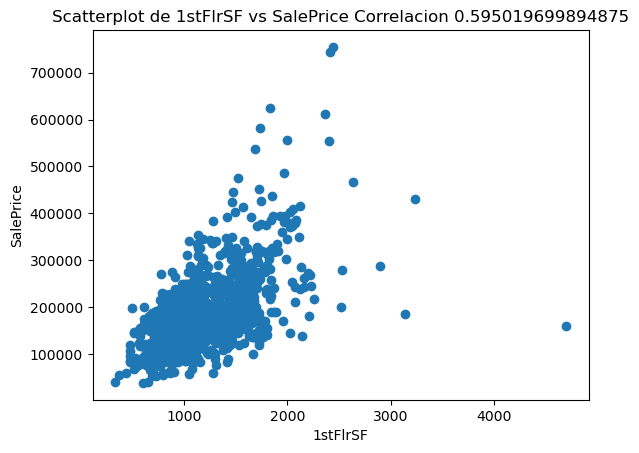

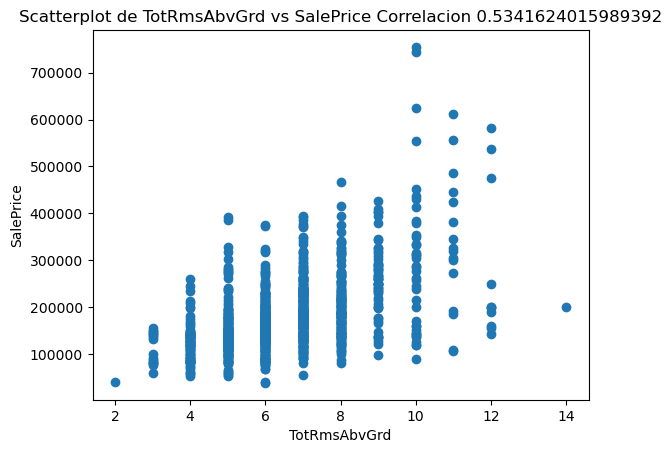

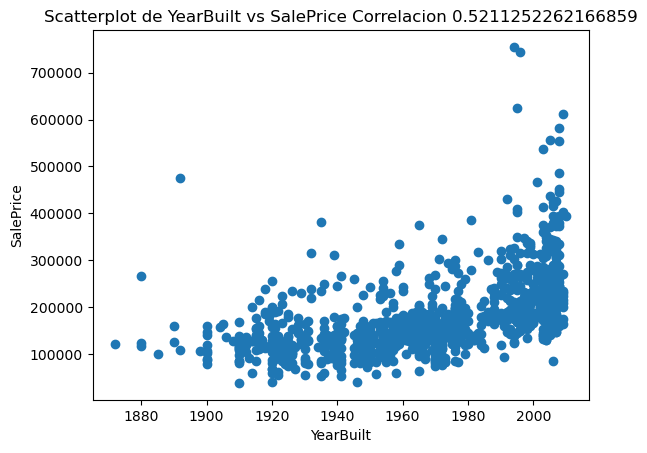

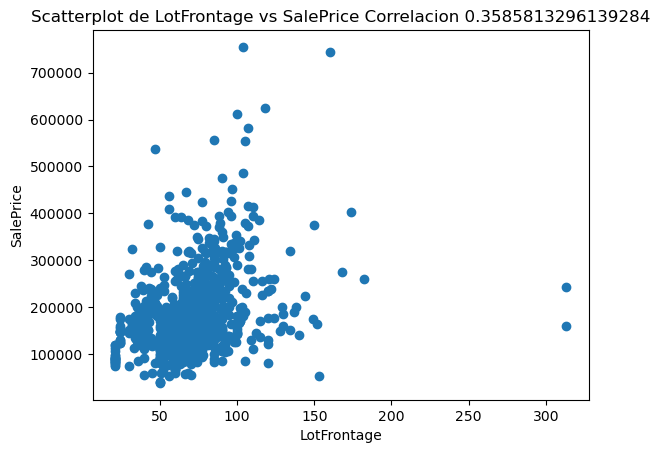

In [16]:
plt.scatter(df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de OverallQual vs SalePrice Correlacion {correlacionOverallQual}')
plt.show()

plt.scatter(df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de 1stFlrSF vs SalePrice Correlacion {correlacion1stFlrSF}')
plt.show()

plt.scatter(df_entrenamiento['TotRmsAbvGrd'], df_entrenamiento['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de TotRmsAbvGrd vs SalePrice Correlacion {correlacionTotRmsAbvGrd}')
plt.show()

plt.scatter(df_entrenamiento['YearBuilt'], df_entrenamiento['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de YearBuilt vs SalePrice Correlacion {correlacionYearBuilt}')
plt.show()

plt.scatter(df_entrenamiento['LotFrontage'], df_entrenamiento['SalePrice'])
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title(f'Scatterplot de LotFrontage vs SalePrice Correlacion {correlacionLotFrontage}')
plt.show()


### 5.4 Basado en la grafica y el coeficiente de correlacion de cada par x,y elegir las 2 variables con mas potencial predictivo es decir las 2 variables que presentan mayor correlacion entre dicha variable y la variable dependiente

Se han escogido las variables **OverallQual** y **1stFlrSF** ya que presentan una mayor correlación entre x, y; siendo estas: **0.7964358126132067** y **0.5997063853756309** respectivamente

## 6. Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.

In [50]:
def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    # Creamos una matriz de 2 columnas, con x en la primera columna y 1 en la segunda columna
    X = np.column_stack((x, np.ones_like(x)))
    
    # Inicializamos los vectores b0 y b1
    beta = np.zeros(2)
    
    # Almacenar el error de cada iteración
    errores = []
    
    # Almacenar el modelo de cada iteración
    modelos = []
    
    # Iterar sobre el número de épocas
    for epoch in range(epochs):
        # Calcular las predicciones del modelo
        y_pred = np.dot(X, beta)
        
        # Calcular el error (suma de los errores al cuadrado)
        error = ((y_pred - y) ** 2).mean()
        
        # Almacenar el error de esta iteración
        errores.append(error)
        
        # Almacenar el modelo de esta iteración
        modelos.append({'Pendiente': beta[0], 'Intercepto': beta[1]})
        
        # Actualizar los parámetros del modelo usando el gradiente descendente
        gradiente = np.dot(X.T, y_pred - y) / len(y)
        beta -= alpha * gradiente
        
        # Imprimir el error cada 'imprimir_error_cada' iteraciones
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración: {epoch}, Error: {error}")
    
    print(f"Pendiente: {beta[0]}, Intercepto: {beta[1]}")
    print()
    print()
    
    # Devolver los parámetros finales del modelo, el vector de errores y la lista de modelos
    return beta, errores, modelos

In [58]:
betaFst, erroresFst, modelsFst = entrenar_regresion_lineal(df_entrenamiento['OverallQual'], df_entrenamiento['SalePrice'], epochs=250, imprimir_error_cada=20, alpha=0.00001)
betaSnd, erroresSnd, modelsSnd = entrenar_regresion_lineal(df_entrenamiento['1stFlrSF'], df_entrenamiento['SalePrice'], epochs=200, imprimir_error_cada=20, alpha=0.000001)

Iteración: 0, Error: 38656365082.26456
Iteración: 20, Error: 38094185667.57809
Iteración: 40, Error: 37540852886.101654
Iteración: 60, Error: 36996227521.98837
Iteración: 80, Error: 36460172550.17419
Iteración: 100, Error: 35932553101.902435
Iteración: 120, Error: 35413236430.790985
Iteración: 140, Error: 34902091879.433205
Iteración: 160, Error: 34398990846.524666
Iteración: 180, Error: 33903806754.507103
Iteración: 200, Error: 33416415017.72152
Iteración: 220, Error: 32936693011.062485
Iteración: 240, Error: 32464520039.125763
Pendiente: 2800.7252330843435, Intercepto: 427.060363517319


Iteración: 0, Error: 38656365082.26456
Iteración: 20, Error: 4271765502.7601
Iteración: 40, Error: 4271764906.1308026
Iteración: 60, Error: 4271764309.542625
Iteración: 80, Error: 4271763712.956867
Iteración: 100, Error: 4271763116.3735285
Iteración: 120, Error: 4271762519.79261
Iteración: 140, Error: 4271761923.2141104
Iteración: 160, Error: 4271761326.6380305
Iteración: 180, Error: 4271760730.06437

In [61]:
betaFst, betaSnd

(array([2800.72523308,  427.06036352]), array([151.2683974 ,   0.88936494]))